In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

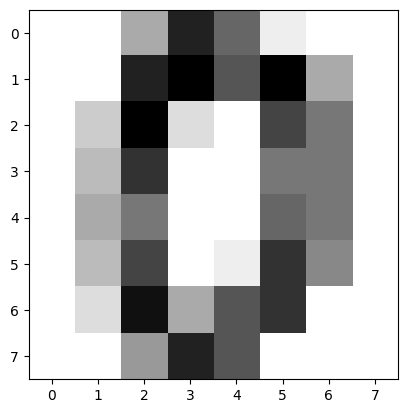

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [12]:

# split X_train, Y_train, X_test, Y_test

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2)

In [13]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [14]:
X_train.shape[1]

64

In [15]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(64,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(learning_rate=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 18,986
Trainable params: 18,986
Non-trainable params: 0
_________________________________________________________________


In [16]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

Epoch 1/30
45/45 [==============================] - 1s 10ms/step - loss: 1.5704 - accuracy: 0.6110 - val_loss: 0.2922 - val_accuracy: 0.9028
Epoch 2/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8984 - val_loss: 0.1611 - val_accuracy: 0.9500
Epoch 3/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9527 - val_loss: 0.1412 - val_accuracy: 0.9528
Epoch 4/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9485 - val_loss: 0.1663 - val_accuracy: 0.9472
Epoch 5/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9471 - val_loss: 0.2457 - val_accuracy: 0.9361
Epoch 6/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9548 - val_loss: 0.1393 - val_accuracy: 0.9611
Epoch 7/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1092 - accuracy: 0.9638 - val_loss: 0.1073 - val_accuracy: 0.9694
Epoch 8/30
45/45 [=

In [17]:
# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

In [18]:
# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.9444444444444444
